<a href="https://colab.research.google.com/github/aninbangkit/ML_Sehat-Mentalku/blob/main/Sehat_Mentalku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving train_sm.csv to train_sm.csv


In [7]:
df = pd.read_csv("train_sm.csv")

In [8]:
df.shape

(7431, 3)

In [9]:
df.head()

,id,text,target
0,2.852640e+17,I just want to die,0.0
1,2.852640e+17,I'm gone always be Good,1.0
2,2.852640e+17,Fuck my life,0.0
3,2.852640e+17,I'm in love,1.0
4,2.852640e+17,I'm a good noodle,1.0


In [10]:
print((df.target == 1).sum()) # happy
print((df.target == 0).sum()) # gak happy ya bund

4146
3238


In [76]:
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) 
    text = re.sub('#', '', text) 
    text = re.sub('RT[\s]+', '', text) 
    text = re.sub('!', '', text)  
    return text
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

In [79]:
df["text"] = df.text.map(remove_URL) # map(lambda x: remove_URL(x))
df["text"] = df.text.map(remove_punct)
df["text"] = df.text.map(cleanTxt)
df["text"] = df.text.map(deEmojify)

In [80]:
# remove stopwords
# pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [82]:
df["text"] = df.text.map(remove_stopwords)

In [83]:
df.text

0                                 want die
1                      im gone always good
2                                fuck life
3                                  im love
4                           im good noodle
                       ...                
7426    ajhgdfakjhajha im disappointed orz
7427                          rt suck life
7428                 life shit guess meant
7429                                  hate
7430                        feel depressed
Name: text, Length: 7431, dtype: object

In [84]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)

In [85]:
len(counter)

3274

In [86]:
counter

Counter({'want': 446,
         'die': 51,
         'im': 2807,
         'gone': 6,
         'always': 119,
         'good': 992,
         'fuck': 250,
         'life': 2255,
         'love': 781,
         'noodle': 2,
         'regretsi': 1,
         'none': 13,
         'wish': 42,
         'many': 16,
         'things': 41,
         'could': 44,
         'different': 15,
         'yeah': 46,
         'totally': 5,
         'fine': 185,
         'friends': 156,
         'damn': 56,
         'best': 208,
         'boyfriend': 32,
         'know': 111,
         'bad': 177,
         'person': 88,
         'rt': 2009,
         'dont': 339,
         'feel': 427,
         'thanks': 376,
         'sweetie': 1,
         'suck': 67,
         '3': 65,
         'worst': 117,
         'trust': 7,
         'issues': 6,
         'ever': 135,
         'fucking': 113,
         'sucks': 83,
         'lol': 114,
         'still': 52,
         'sad': 288,
         'single': 42,
         'joke': 24,
    

In [87]:
num_unique_words = len(counter)

In [88]:
train_size = int(df.shape[0] * 0.8) #bagi training sama test

train_df = df[:train_size]
val_df = df[train_size:]

#Pisahin text
train_sentences = train_df.text.to_numpy()
train_labels = train_df.target.to_numpy()
val_sentences = val_df.text.to_numpy()
val_labels = val_df.target.to_numpy()


In [89]:
train_sentences.shape, val_sentences.shape

((5944,), (1487,))

In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) 

In [91]:
word_index = tokenizer.word_index

In [92]:
word_index

{'im': 1,
 'life': 2,
 'rt': 3,
 'good': 4,
 'happy': 5,
 'love': 6,
 'god': 7,
 'blessing': 8,
 'hate': 9,
 'thanks': 10,
 'want': 11,
 'deserve': 12,
 'feel': 13,
 'dont': 14,
 'great': 15,
 'blessed': 16,
 'sad': 17,
 'aint': 18,
 'tripping': 19,
 'fuck': 20,
 'meekmill': 21,
 'best': 22,
 'fine': 23,
 'bad': 24,
 'really': 25,
 'awesome': 26,
 'like': 27,
 'use': 28,
 'everything': 29,
 'friends': 30,
 'ever': 31,
 'proud': 32,
 'boring': 33,
 'always': 34,
 'lol': 35,
 'shit': 36,
 'know': 37,
 'fucking': 38,
 'ive': 39,
 'worst': 40,
 'need': 41,
 'much': 42,
 'reiatable': 43,
 'sucks': 44,
 'get': 45,
 'think': 46,
 'ugly': 47,
 'person': 48,
 'girl': 49,
 'change': 50,
 'feeling': 51,
 'never': 52,
 'amazing': 53,
 'thank': 54,
 'got': 55,
 'people': 56,
 'one': 57,
 'man': 58,
 'thats': 59,
 'suck': 60,
 '3': 61,
 'beautiful': 62,
 'perfect': 63,
 'damn': 64,
 'live': 65,
 'depressed': 66,
 'die': 67,
 'pretty': 68,
 'true': 69,
 'nothing': 70,
 'come': 71,
 'still': 72,
 'omg

In [93]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [94]:
print(train_sentences[10:15])
print(train_sequences[10:15])

['know im bad person' 'rt dont feel good' 'thanks sweetie im fine'
 'rt suck life' 'im best 3']
[[37, 1, 24, 48], [3, 14, 13, 4], [10, 973, 1, 23], [3, 60, 2], [1, 22, 61]]


In [95]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape


((5944, 20), (1487, 20))

In [96]:
train_padded[10]

array([37,  1, 24, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

In [97]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

know im bad person
[37, 1, 24, 48]
[37  1 24 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [98]:
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [99]:
reverse_word_index

{1: 'im',
 2: 'life',
 3: 'rt',
 4: 'good',
 5: 'happy',
 6: 'love',
 7: 'god',
 8: 'blessing',
 9: 'hate',
 10: 'thanks',
 11: 'want',
 12: 'deserve',
 13: 'feel',
 14: 'dont',
 15: 'great',
 16: 'blessed',
 17: 'sad',
 18: 'aint',
 19: 'tripping',
 20: 'fuck',
 21: 'meekmill',
 22: 'best',
 23: 'fine',
 24: 'bad',
 25: 'really',
 26: 'awesome',
 27: 'like',
 28: 'use',
 29: 'everything',
 30: 'friends',
 31: 'ever',
 32: 'proud',
 33: 'boring',
 34: 'always',
 35: 'lol',
 36: 'shit',
 37: 'know',
 38: 'fucking',
 39: 'ive',
 40: 'worst',
 41: 'need',
 42: 'much',
 43: 'reiatable',
 44: 'sucks',
 45: 'get',
 46: 'think',
 47: 'ugly',
 48: 'person',
 49: 'girl',
 50: 'change',
 51: 'feeling',
 52: 'never',
 53: 'amazing',
 54: 'thank',
 55: 'got',
 56: 'people',
 57: 'one',
 58: 'man',
 59: 'thats',
 60: 'suck',
 61: '3',
 62: 'beautiful',
 63: 'perfect',
 64: 'damn',
 65: 'live',
 66: 'depressed',
 67: 'die',
 68: 'pretty',
 69: 'true',
 70: 'nothing',
 71: 'come',
 72: 'still',
 73: 

In [100]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [101]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[37, 1, 24, 48]
know im bad person


In [102]:
from tensorflow.keras import layers

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 32)            104768    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 129,665
Trainable params: 129,665
Non-trainable params: 0
_________________________________________________________________


In [103]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [104]:
a=model.fit(train_padded, train_labels, epochs=20, validation_data=(val_padded, val_labels), verbose=2)


Epoch 1/20
186/186 - 5s - loss: nan - accuracy: 0.4280 - val_loss: nan - val_accuracy: 0.4687
Epoch 2/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 3/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 4/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 5/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 6/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 7/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 8/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 9/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 10/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - val_loss: nan - val_accuracy: 0.4687
Epoch 11/20
186/186 - 3s - loss: nan - accuracy: 0.4275 - v

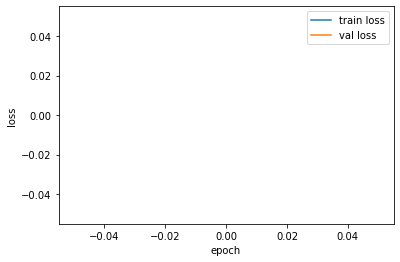

In [105]:
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

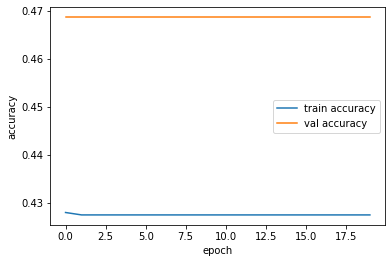

In [109]:
plt.plot(a.history['accuracy'], label='train accuracy')
plt.plot(a.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [112]:
predictions = model.predict(train_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [113]:
print(train_sentences[10:20])

print(train_labels[10:20])
print(predictions[10:20])

['know im bad person' 'rt dont feel good' 'thanks sweetie im fine'
 'rt suck life' 'im best 3' 'worst trust issues ever'
 'life fucking sucks lol' 'rt still dont feel good' 'life sad single joke'
 'know hate life']
[0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
